# Time Series Things

In [1]:
import xarray as xr
import cftime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy as cp
import netCDF4
import h5netcdf
import dask
from scipy.stats import linregress

from icepy.analysis import *

monthletters = ['J','F','M','A','M','J','J','A','S','O','N','D']

# Open the datasets and calculate SIE

### Had2CIS observations

In [23]:
data_path = "../data/obs/Had2CIS/sic_1x1/had2cis_1x1_198001_202004_sicn.nc"
grid_path = "../data/obs/Had2CIS/sic_1x1/had2cis_grid.nc"

# open data
sic = format_time_coord(xr.open_dataset(data_path),'1980-01','2020-04',freq='M')
grid = xr.open_dataset(grid_path)

# calculate SIE and anomalies
method = 'mitch'
daterange = (2000,2019)
daterange_clim = (1992,2015)
sie_Had2CIS = sic_to_sie(sic, grid, lat_bounds=(-90,0), sic_label='SICN', lat_label='lat', lon_label='lon', ensemble=None)
sie_anom_Had2CIS = remove_trend(sie_Had2CIS,'SIE',method=method,ref_period=daterange)
sie_clim_Had2CIS = get_climatology(sie_Had2CIS,var='SIE',ref_period=daterange_clim)

c:\Users\Robert payne\Desktop\University\sea_ice\python\icepy\analysis.py:88: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  dataset['time'] = date_range
c:\Users\Robert payne\Desktop\University\sea_ice\python\icepy\analysis.py:88: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable c

### CanESM5 Wind-Nudged

In [24]:
data_path = "../data/model/CanESM5/nudge/winds_195001-202112/sic_1x1/siconc_SImon_CanESM5_01_historical_r1i1p1f1_gn_195001-202112_1x1.nc"
grid_path = "../data/model/CanESM5/nudge/winds_195001-202112/sic_1x1/siconc_SImon_CanESM5_01_historical_grid.nc"

# open data
sic = format_time_coord(xr.open_dataset(data_path),'1950-01','2021-12',freq='M')
grid = xr.open_dataset(grid_path)

# calculate SIE
sie_CanESM5_1950 = sic_to_sie(sic, grid, lat_bounds=(-90,0), sic_label='siconc', lat_label='lat', lon_label='lon', ensemble=None)
sie_anom_CanESM5_1950 = remove_trend(sie_CanESM5_1950,'SIE',method=method,ref_period=daterange)
sie_clim_CanESM5_1950 = get_climatology(sie_CanESM5_1950, var='SIE',ref_period=daterange_clim)

c:\Users\Robert payne\Desktop\University\sea_ice\python\icepy\analysis.py:88: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  dataset['time'] = date_range
c:\Users\Robert payne\Desktop\University\sea_ice\python\icepy\analysis.py:88: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable c

In [25]:
data_path = "../data/model/CanESM5/nudge/winds_199001-202012/sic_1x1/siconc_SImon_CanESM5_05_historical_r*.nc"
grid_path = "../data/model/CanESM5/nudge/winds_199001-202012/sic_1x1/siconc_SImon_CanESM5_05_historical_grid.nc"

# open data
sic = format_time_coord(xr.open_mfdataset(data_path),'1990-01','2020-12',freq='M')
grid = xr.open_dataset(grid_path)

# calculate SIE
sie_CanESM5_1990 = sic_to_sie(sic, grid, lat_bounds=(-90,0), sic_label='siconc', lat_label='lat', lon_label='lon', ensemble=None).load()
sie_anom_CanESM5_1990 = remove_trend(sie_CanESM5_1990,'SIE',method=method,ref_period=daterange)
sie_clim_CanESM5_1990 = get_climatology(sie_CanESM5_1990, var='SIE',ref_period=daterange_clim)

c:\Users\Robert payne\Desktop\University\sea_ice\python\icepy\analysis.py:88: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  dataset['time'] = date_range
c:\Users\Robert payne\Desktop\University\sea_ice\python\icepy\analysis.py:88: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable c

In [26]:
data_path = "../data/model/CanESM5/nudge/winds_200001-202012/sic_1x1/siconc_SImon_CanESM5_06_historical_r*.nc"
grid_path = "../data/model/CanESM5/nudge/winds_200001-202012/sic_1x1/siconc_SImon_CanESM5_06_historical_grid.nc"

# open data
sic = format_time_coord(xr.open_mfdataset(data_path),'2000-01','2020-12',freq='M')
grid = xr.open_dataset(grid_path)

# calculate SIE
sie_CanESM5_2000 = sic_to_sie(sic, grid, lat_bounds=(-90,0), sic_label='siconc', lat_label='lat', lon_label='lon', ensemble=None).load()
sie_anom_CanESM5_2000 = remove_trend(sie_CanESM5_2000,'SIE',method=method,ref_period=daterange)
sie_clim_CanESM5_2000 = get_climatology(sie_CanESM5_2000, var='SIE',ref_period=daterange_clim)

c:\Users\Robert payne\Desktop\University\sea_ice\python\icepy\analysis.py:88: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  dataset['time'] = date_range
c:\Users\Robert payne\Desktop\University\sea_ice\python\icepy\analysis.py:88: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable c

### CanESM5 Wind+T Nudged

In [27]:
data_path = "../data/model/CanESM5/nudge/winds+temp_195001-202112/sic_1x1/siconc_SImon_fullnudge_CanESM5_01_historical_r1i1p1f1_gn_195001-202112_1x1.nc"
grid_path = "../data/model/CanESM5/nudge/winds+temp_195001-202112/sic_1x1/siconc_SImon_fullnudge_CanESM5_01_historical_grid.nc"

# open data
sic = format_time_coord(xr.open_dataset(data_path),'1950-01','2021-12',freq='M')
grid = xr.open_dataset(grid_path)

# calculate SIE
sie_CanESM5_1950full = sic_to_sie(sic, grid, lat_bounds=(-90,0), sic_label='siconc', lat_label='lat', lon_label='lon', ensemble=None)
sie_anom_CanESM5_1950full = remove_trend(sie_CanESM5_1950full,'SIE',method=method,ref_period=daterange)
sie_clim_CanESM5_1950full = get_climatology(sie_CanESM5_1950full, var='SIE',ref_period=daterange_clim)

c:\Users\Robert payne\Desktop\University\sea_ice\python\icepy\analysis.py:88: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  dataset['time'] = date_range
c:\Users\Robert payne\Desktop\University\sea_ice\python\icepy\analysis.py:88: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable c

# Plotting the timeseries

### Monthly Anomalies

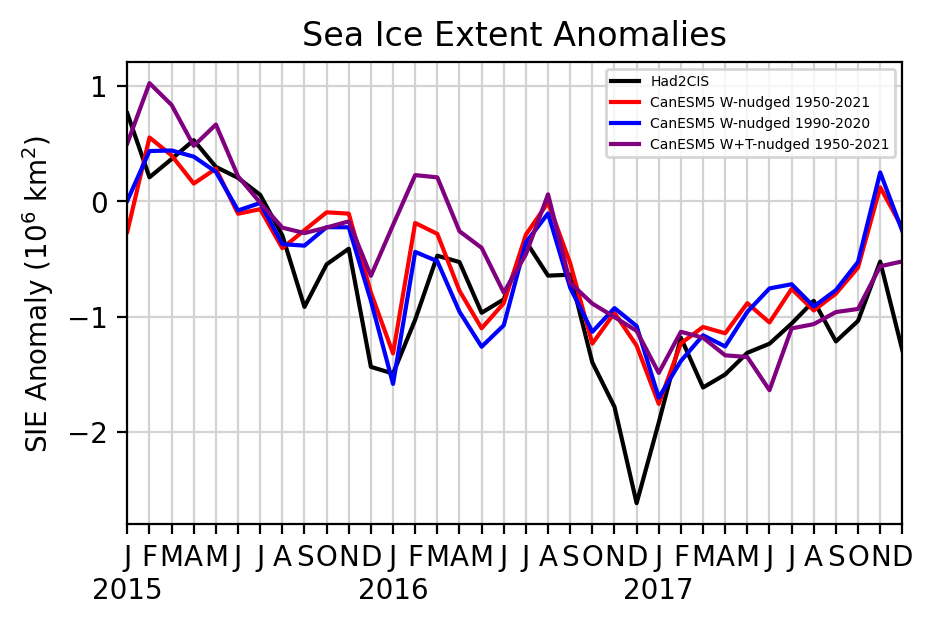

In [28]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=200)

# The data to be plotted, the years over which to plot, labels for legend, etc.
y0,y1 = [2015,2017]
timeseries = [sie_anom_Had2CIS, sie_anom_CanESM5_1950, sie_anom_CanESM5_1990, sie_anom_CanESM5_1950full]
colors = ['black', 'red', 'blue', 'purple']
labels = ['Had2CIS','CanESM5 W-nudged 1950-2021','CanESM5 W-nudged 1990-2020','CanESM5 W+T-nudged 1950-2021']

# Plot the data
for i,data in enumerate(timeseries):
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True).to_dataframe().plot.line(ax=ax,color=colors[i],legend=True)

# Other details of the plots
xlabels = monthletters*(y1-y0+1)
for i,yr in enumerate(np.arange(y0,y1+1,1)):
    xlabels[12*i] += f'\n{yr}'
ax.set_xlim(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1}-12"))
ax.set_xticks(np.arange(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1+1}-01"),np.timedelta64(1,"M")))
ax.set_xticklabels(xlabels)
ax.set_xlabel(None)
ax.set_ylabel(r"SIE Anomaly ($10^6\ \mathrm{km}^2$)")
ax.set_title("Sea Ice Extent Anomalies")
ax.grid(color='lightgrey')
ax.legend(labels,fontsize=5)
plt.show()

### Yearly Mean

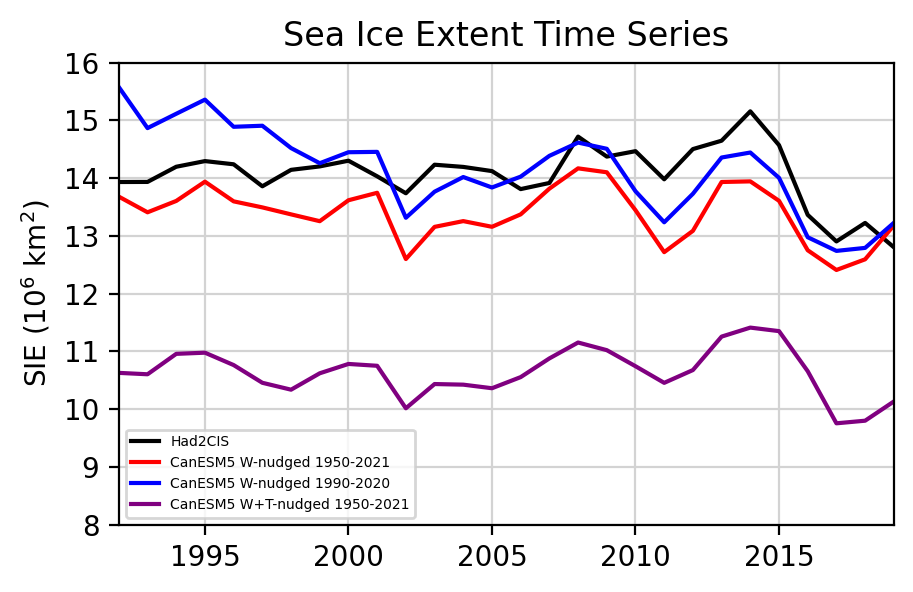

In [36]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=200)

# The data to be plotted, the years over which to plot, labels for legend, etc.
y0,y1 = [1992,2019]
timeseries = [sie_Had2CIS['SIE'].groupby('time.year').mean(), sie_CanESM5_1950['SIE'].groupby('time.year').mean(), sie_CanESM5_1990['SIE'].groupby('time.year').mean(), sie_CanESM5_1950full['SIE'].groupby('time.year').mean()]
colors = ['black', 'red', 'blue', 'purple']
labels = ['Had2CIS','CanESM5 W-nudged 1950-2021','CanESM5 W-nudged 1990-2020','CanESM5 W+T-nudged 1950-2021']

# Plot the data
for i,data in enumerate(timeseries):
    data.where((data['year']>=y0) & (data['year']<=y1),drop=True).to_dataframe().plot.line(ax=ax,color=colors[i],legend=True)

# Other details of the plots
ax.set_xlim(y0,y1)
ax.set_xlabel(None)
ax.set_ylabel(r"SIE ($10^6\ \mathrm{km}^2$)")
ax.set_title("Sea Ice Extent Time Series")
ax.set_ylim(8,16)
ax.grid(color='lightgrey')
ax.legend(labels,fontsize=5,loc='lower left')
plt.show()

### Climatology

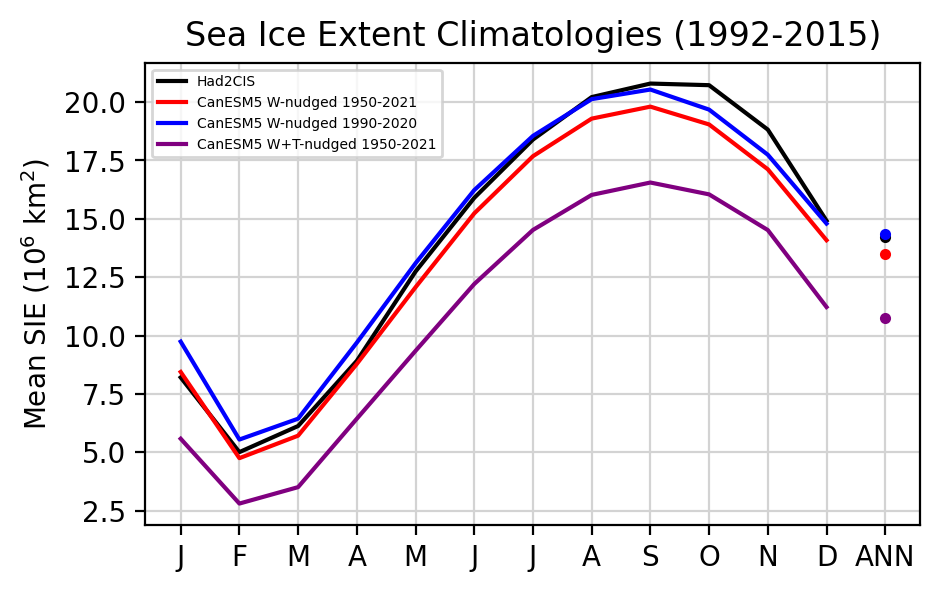

In [30]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=200)

# The data to be plotted. Labels for legend are defined in a previous cell.
timeseries = [sie_clim_Had2CIS, sie_clim_CanESM5_1950, sie_clim_CanESM5_1990, sie_clim_CanESM5_1950full]
xticklabels = ['J','F','M','A','M','J','J','A','S','O','N','D','ANN']

# Plot the data
for i,data in enumerate(timeseries):
    ax.plot(data[1:],color=colors[i],label=labels[i])
for i,data in enumerate(timeseries):
    ax.plot(12,data[0],'.',color=colors[i])

# Other details of the plots
ax.set_xticks(np.arange(13))
ax.set_xticklabels(xticklabels)
ax.set_xlabel(None)
ax.set_ylabel(r"Mean SIE ($10^6\ \mathrm{km}^2$)")
ax.set_title(f"Sea Ice Extent Climatologies ({daterange_clim[0]}-{daterange_clim[1]})")
ax.grid(color='lightgrey')
ax.legend(labels,fontsize=5)
plt.show()

### Difference Between Model and Observations

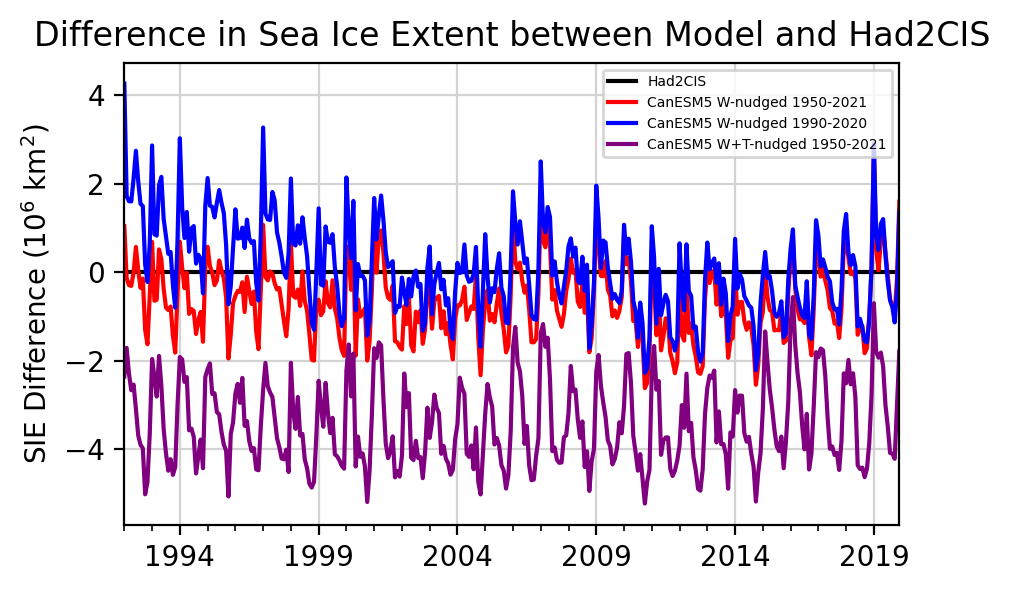

In [31]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=200)

# The data to be plotted, the years over which to plot, labels for legend, etc.
y0,y1 = [1992,2019]
timeseries = [sie_Had2CIS['SIE']-sie_Had2CIS['SIE'], sie_CanESM5_1950['SIE']-sie_Had2CIS['SIE'], sie_CanESM5_1990['SIE']-sie_Had2CIS['SIE'], sie_CanESM5_1950full['SIE']-sie_Had2CIS['SIE']]
colors = ['black', 'red', 'blue', 'purple']
labels = ['Had2CIS','CanESM5 W-nudged 1950-2021','CanESM5 W-nudged 1990-2020','CanESM5 W+T-nudged 1950-2021']

# Plot the data
for i,data in enumerate(timeseries):
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True).to_dataframe().plot.line(ax=ax,color=colors[i],legend=True)

# Other details of the plots
#ax.set_xlim(y0,y1)
ax.set_xlabel(None)
ax.set_ylabel(r"SIE Difference ($10^6\ \mathrm{km}^2$)")
ax.set_title("Difference in Sea Ice Extent between Model and Had2CIS")
ax.grid(color='lightgrey')
ax.legend(labels,fontsize=5,loc='upper right')
plt.show()